The Dataset has been taken from kaggle using the following link
https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/data?select=Tesla.csv+-+Tesla.csv.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /home/tanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tanya/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [3]:
df_Train = df[0:1600]
df_test = df[1600:]

In [4]:
df_Train

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1595,10/27/2016,211.339996,213.699997,201.649994,204.009995,13093700,204.009995
1596,10/28/2016,204.000000,205.320007,199.830002,199.970001,4280100,199.970001
1597,10/31/2016,202.490005,202.490005,195.809998,197.729996,4692300,197.729996
1598,11/1/2016,198.039993,198.500000,188.110001,190.789993,7060000,190.789993


In [5]:
df_test

,Date,Open,High,Low,Close,Volume,Adj Close
1600,11/3/2016,189.000000,191.470001,187.039993,187.419998,2653000,187.419998
1601,11/4/2016,189.000000,193.460007,185.960007,190.559998,5146000,190.559998
1602,11/7/2016,193.589996,194.289993,190.050003,193.210007,3870100,193.210007
1603,11/8/2016,193.789993,197.490005,191.259995,194.940002,3267600,194.940002
1604,11/9/2016,186.880005,192.000000,183.949997,190.059998,8173100,190.059998
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [6]:
train = df_Train.iloc[:, 4:5].values
test_actual = df_test.iloc[:, 4:5].values

In [7]:
##Considering closing value of stocks so extracting the close column 
train    

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [197.729996],
       [190.789993],
       [188.020004]])

In [8]:
test_actual

array([[187.419998],
       [190.559998],
       [193.210007],
       [194.940002],
       [190.059998],
       [185.350006],
       [188.559998],
       [181.449997],
       [183.770004],
       [183.929993],
       [188.660004],
       [185.020004],
       [184.520004],
       [191.169998],
       [193.139999],
       [196.649994],
       [196.119995],
       [189.570007],
       [189.399994],
       [181.880005],
       [181.470001],
       [186.800003],
       [185.850006],
       [193.149994],
       [192.289993],
       [192.179993],
       [192.429993],
       [198.149994],
       [198.690002],
       [197.580002],
       [202.490005],
       [202.729996],
       [208.789993],
       [207.699997],
       [208.449997],
       [213.339996],
       [219.529999],
       [219.740005],
       [214.679993],
       [213.690002],
       [216.990005],
       [226.990005],
       [226.75    ],
       [229.009995],
       [231.279999],
       [229.869995],
       [229.729996],
       [229.5

In [9]:
######NORmalizing the train values 

from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler(feature_range = (0, 1))
training = mm_sc.fit_transform(train)

In [10]:
training

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.67321636],
       [0.64753548],
       [0.63728537]])

In [11]:
X_train = []
y_train = []
for i in range(60, 1600):
    X_train.append(training[i-60:i, 0])
    y_train.append(training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [12]:
X_train.shape

(1540, 60)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train

array([[[0.02993635],
        [0.02971433],
        [0.02279455],
        ...,
        [0.01946418],
        [0.01839106],
        [0.01506069]],

       [[0.02971433],
        [0.02279455],
        [0.01258141],
        ...,
        [0.01839106],
        [0.01506069],
        [0.01391355]],

       [[0.02279455],
        [0.01258141],
        [0.00114713],
        ...,
        [0.01506069],
        [0.01391355],
        [0.01591178]],

       ...,

       [[0.79273976],
        [0.77841917],
        [0.78922437],
        ...,
        [0.68990526],
        [0.69645496],
        [0.68150531]],

       [[0.77841917],
        [0.78922437],
        [0.77653192],
        ...,
        [0.69645496],
        [0.68150531],
        [0.67321636]],

       [[0.78922437],
        [0.77653192],
        [0.77379365],
        ...,
        [0.68150531],
        [0.67321636],
        [0.64753548]]])

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [16]:

Stock_pred = Sequential()

Stock_pred.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60, return_sequences = True))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60, return_sequences = True))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(Dense(units = 1))

Stock_pred.compile(optimizer = 'adam', loss = 'mean_squared_error')
##Training the model 
Stock_pred.fit(X_train, y_train, epochs = 25, batch_size = 16)

Epoch 1/25
97/97 [==============================] - 11s 75ms/step - loss: 0.0163
Epoch 2/25
97/97 [==============================] - 7s 74ms/step - loss: 0.0044
Epoch 3/25
97/97 [==============================] - 8s 79ms/step - loss: 0.0038
Epoch 4/25
97/97 [==============================] - 7s 74ms/step - loss: 0.0039
Epoch 5/25
97/97 [==============================] - 7s 76ms/step - loss: 0.0037
Epoch 6/25
97/97 [==============================] - 8s 79ms/step - loss: 0.0026
Epoch 7/25
97/97 [==============================] - 8s 80ms/step - loss: 0.0027
Epoch 8/25
97/97 [==============================] - 7s 77ms/step - loss: 0.0030
Epoch 9/25
97/97 [==============================] - 8s 78ms/step - loss: 0.0026
Epoch 10/25
97/97 [==============================] - 8s 78ms/step - loss: 0.0027
Epoch 11/25
97/97 [==============================] - 8s 81ms/step - loss: 0.0022
Epoch 12/25
97/97 [==============================] - 8s 78ms/step - loss: 0.0023
Epoch 13/25
97/97 [=================

In [17]:
test_head = train[-60:]


In [18]:
test_head

array([[225.649994],
       [224.910004],
       [225.610001],
       [225.589996],
       [223.610001],
       [223.240005],
       [223.509995],
       [225.      ],
       [222.929993],
       [224.839996],
       [222.619995],
       [220.960007],
       [219.990005],
       [215.199997],
       [211.339996],
       [212.009995],
       [200.770004],
       [197.779999],
       [202.830002],
       [201.710007],
       [197.360001],
       [194.470001],
       [198.300003],
       [196.050003],
       [196.410004],
       [200.419998],
       [205.399994],
       [206.339996],
       [204.639999],
       [205.220001],
       [206.429993],
       [207.449997],
       [208.990005],
       [205.809998],
       [206.270004],
       [200.699997],
       [204.029999],
       [213.699997],
       [211.410004],
       [208.460007],
       [201.      ],
       [196.610001],
       [200.949997],
       [200.100006],
       [201.509995],
       [200.240005],
       [196.509995],
       [193.9

In [18]:
test_actual.shape

(92, 1)

In [19]:
##For getting the 1st predicted value, we have o concatenate the last 60 time steps from the training dataset 
test_head.shape

(60, 1)

In [20]:
Test = np.concatenate((test_head,test_actual), axis=0)


In [21]:
Test.shape

(152, 1)

In [22]:
Test

array([[225.649994],
       [224.910004],
       [225.610001],
       [225.589996],
       [223.610001],
       [223.240005],
       [223.509995],
       [225.      ],
       [222.929993],
       [224.839996],
       [222.619995],
       [220.960007],
       [219.990005],
       [215.199997],
       [211.339996],
       [212.009995],
       [200.770004],
       [197.779999],
       [202.830002],
       [201.710007],
       [197.360001],
       [194.470001],
       [198.300003],
       [196.050003],
       [196.410004],
       [200.419998],
       [205.399994],
       [206.339996],
       [204.639999],
       [205.220001],
       [206.429993],
       [207.449997],
       [208.990005],
       [205.809998],
       [206.270004],
       [200.699997],
       [204.029999],
       [213.699997],
       [211.410004],
       [208.460007],
       [201.      ],
       [196.610001],
       [200.949997],
       [200.100006],
       [201.509995],
       [200.240005],
       [196.509995],
       [193.9

In [23]:
Test = mm_sc.transform(Test)
X_test = []
for i in range(60, 152):
    X_test.append(Test[i-60:i, 0])
X_test = np.array(X_test)

In [24]:
X_test

array([[0.77653192, 0.77379365, 0.77638393, ..., 0.67321636, 0.64753548,
        0.63728537],
       [0.77379365, 0.77638393, 0.77630991, ..., 0.64753548, 0.63728537,
        0.6350651 ],
       [0.77638393, 0.77630991, 0.7689831 , ..., 0.63728537, 0.6350651 ,
        0.6466844 ],
       ...,
       [0.67266132, 0.69083037, 0.69171843, ..., 0.84328743, 0.85246444,
        0.89624035],
       [0.69083037, 0.69171843, 0.71414293, ..., 0.85246444, 0.89624035,
        0.88784039],
       [0.69171843, 0.71414293, 0.7101095 , ..., 0.89624035, 0.88784039,
        0.91122698]])

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
X_test

array([[[0.77653192],
        [0.77379365],
        [0.77638393],
        ...,
        [0.67321636],
        [0.64753548],
        [0.63728537]],

       [[0.77379365],
        [0.77638393],
        [0.77630991],
        ...,
        [0.64753548],
        [0.63728537],
        [0.6350651 ]],

       [[0.77638393],
        [0.77630991],
        [0.7689831 ],
        ...,
        [0.63728537],
        [0.6350651 ],
        [0.6466844 ]],

       ...,

       [[0.67266132],
        [0.69083037],
        [0.69171843],
        ...,
        [0.84328743],
        [0.85246444],
        [0.89624035]],

       [[0.69083037],
        [0.69171843],
        [0.71414293],
        ...,
        [0.85246444],
        [0.89624035],
        [0.88784039]],

       [[0.69171843],
        [0.71414293],
        [0.7101095 ],
        ...,
        [0.89624035],
        [0.88784039],
        [0.91122698]]])

In [27]:
y_pred = Stock_pred.predict(X_test)
y_pred = mm_sc.inverse_transform(y_pred)

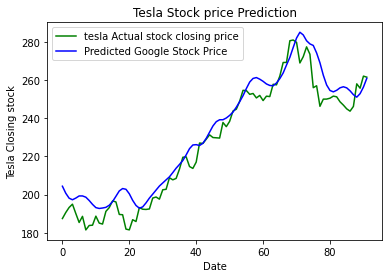

In [29]:
plt.plot(test_actual, color = 'Green', label = 'tesla Actual stock closing price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Tesla Stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Closing stock')
plt.legend()
plt.show()